# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping ....")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | novo aripuana
Processing Record 10 of Set 1 | massawa
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | puerto san carlos
City not found. Skipping ....
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | tehachapi
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | chadron
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | kingston
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.40,84,100,2.69,GS,1732566300
1,invercargill,-46.4000,168.3500,15.01,63,44,6.26,NZ,1732566279
2,puerto ayora,-0.7393,-90.3518,24.75,79,29,3.58,EC,1732565824
3,ribeira grande,38.5167,-28.7000,19.32,94,75,4.63,PT,1732565606
4,uturoa,-16.7333,-151.4333,26.67,80,95,5.40,PF,1732565867


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.40,84,100,2.69,GS,1732566300
1,invercargill,-46.4000,168.3500,15.01,63,44,6.26,NZ,1732566279
2,puerto ayora,-0.7393,-90.3518,24.75,79,29,3.58,EC,1732565824
3,ribeira grande,38.5167,-28.7000,19.32,94,75,4.63,PT,1732565606
4,uturoa,-16.7333,-151.4333,26.67,80,95,5.40,PF,1732565867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

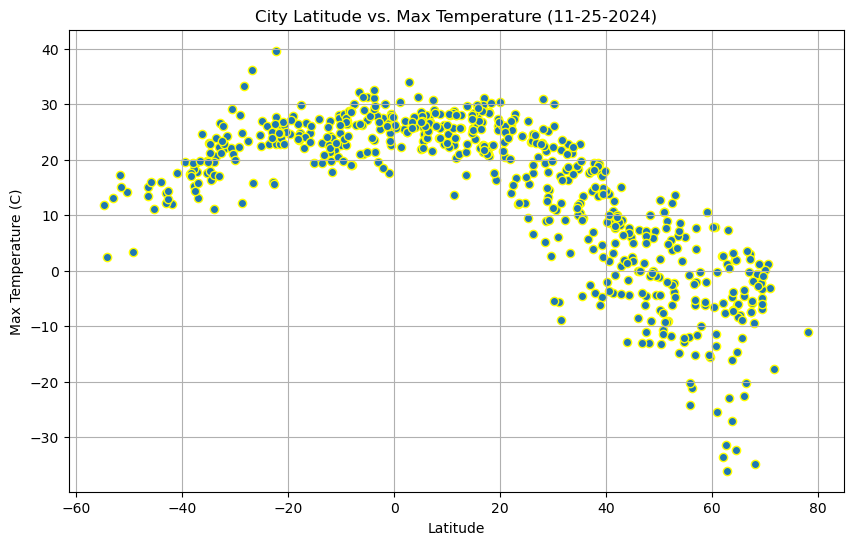

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='yellow', alpha=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

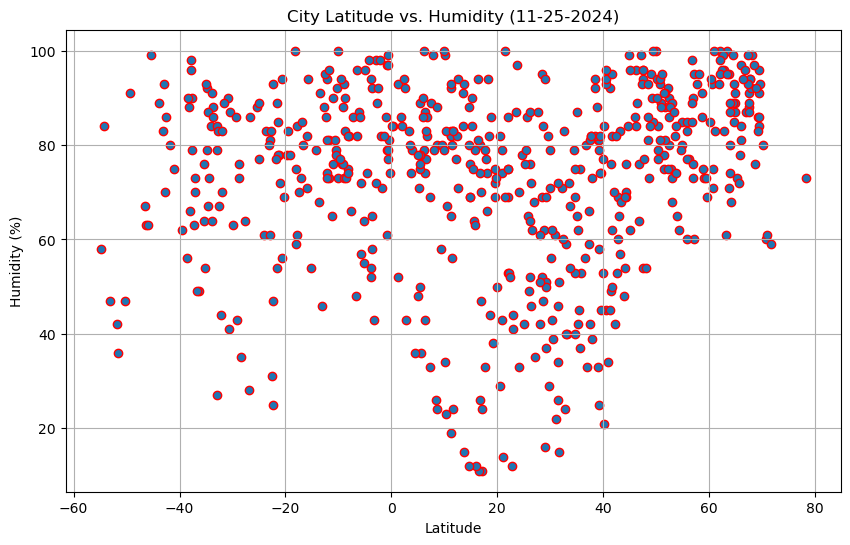

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='red', alpha=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

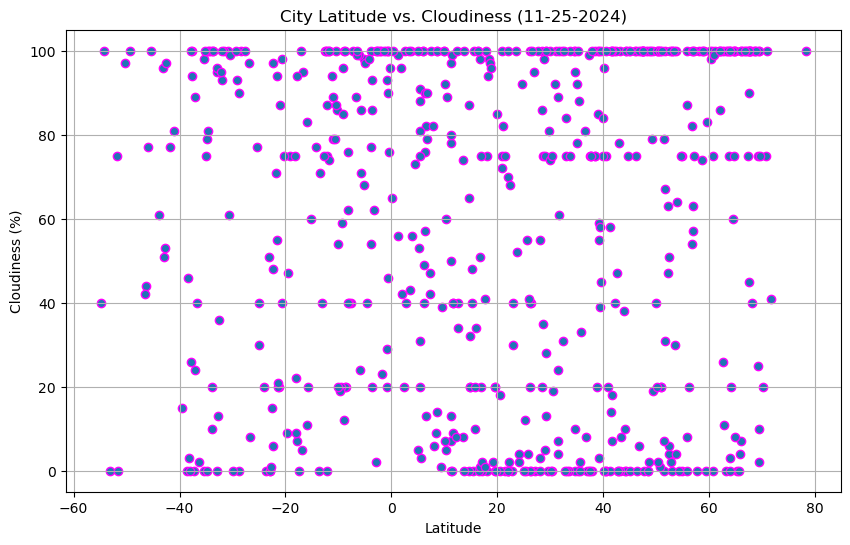

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='magenta', alpha=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness (%)') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

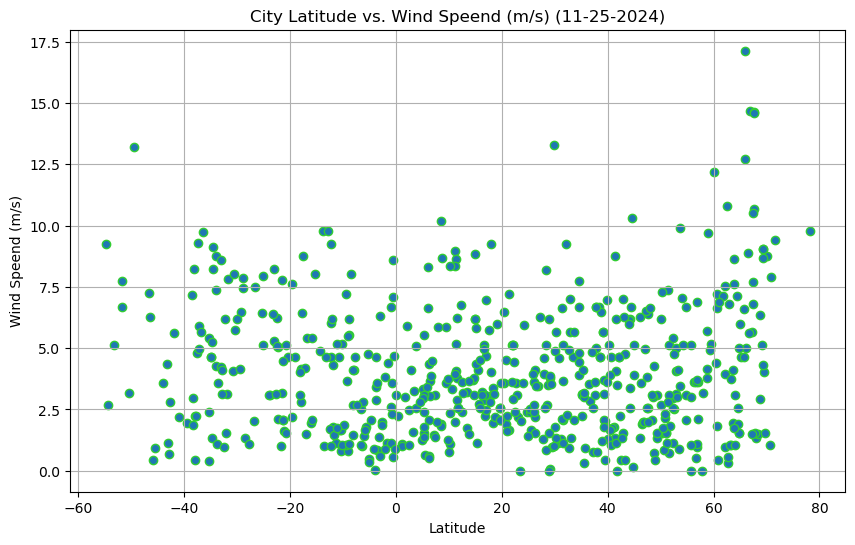

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='limegreen', alpha=1)


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speend (m/s) (%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speend (m/s)') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates, save_path):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Compute linear regression
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values,  edgecolors='blue', alpha=0.75)
    plt.plot(x_values, regress_values, 'r-', label = (f'The r value is: {rvalue**2}$'))
    plt.annotate(line_eq, text_coordinates, fontsize=18, color="red")
    
    # Add labels and title
    plt.xlabel("Lattitude")
    plt.ylabel(title)
    plt.legend()
    plt.grid(True)
    
    # Save and show plot
    plt.savefig(save_path)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ribeira grande,38.5167,-28.7000,19.32,94,75,4.63,PT,1732565606
5,isafjordur,66.0755,-23.1240,-4.53,81,7,4.99,IS,1732565569
6,iqaluit,63.7506,-68.5145,-16.15,71,75,4.12,CA,1732566353
9,massawa,15.6097,39.4500,27.93,64,100,4.09,ER,1732566356
11,albany,42.6001,-73.9662,8.29,53,47,0.45,US,1732566060


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.40,84,100,2.69,GS,1732566300
1,invercargill,-46.4000,168.3500,15.01,63,44,6.26,NZ,1732566279
2,puerto ayora,-0.7393,-90.3518,24.75,79,29,3.58,EC,1732565824
4,uturoa,-16.7333,-151.4333,26.67,80,95,5.40,PF,1732565867
7,waitangi,-43.9535,-176.5597,16.01,89,61,3.58,NZ,1732566271


###  Temperature vs. Latitude Linear Regression Plot

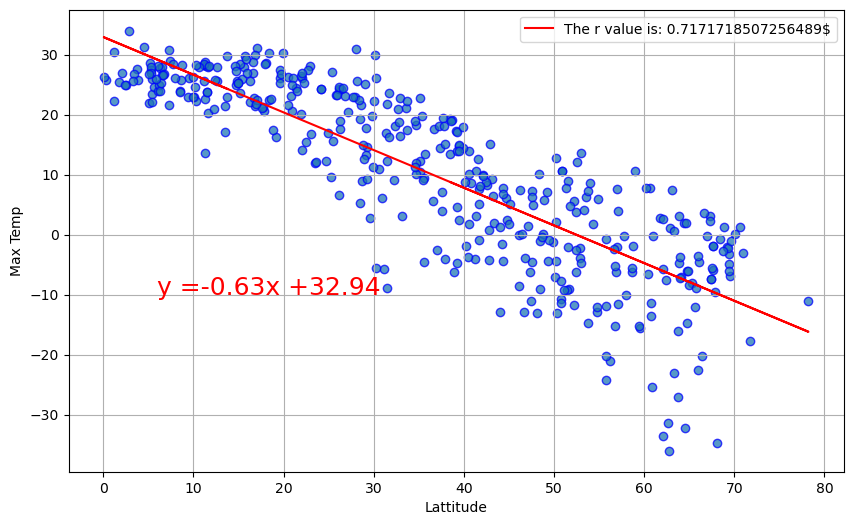

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Create the linear regression plot for Temperature vs. Latitude in the Northern Hemisphere
plot_linear_regression(x_values, y_values, 'Max Temp', (6, -10), 'output_data/FigN_Temp_Lat.png')


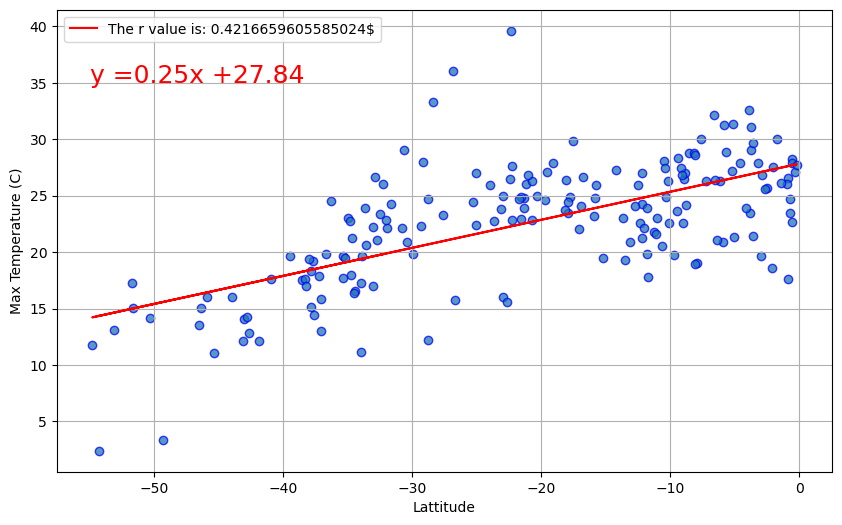

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Create the linear regression plot for Temperature vs. Latitude in the Southern Hemisphere
plot_linear_regression(x_values, y_values, 'Max Temperature (C)', (-55, 35), 'output_data/FigS_Temp_Lat.png')


**Discussion about the linear relationship:** The more the r value is closer to 1 indicates strong corrolation between temperature and latitude. With r value 0.55 it indicates a moderate positive correlation/

### Humidity vs. Latitude Linear Regression Plot

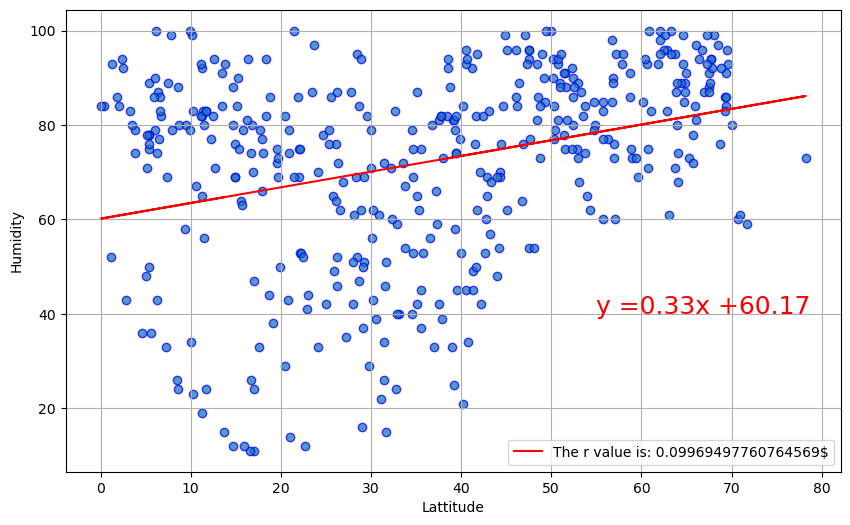

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Create the linear regression plot for Humidity vs. Latitude in the Northern Hemisphere
plot_linear_regression(x_values, y_values, 'Humidity',  (55, 40), 'output_data/FigN_Humidity_Lat.png')


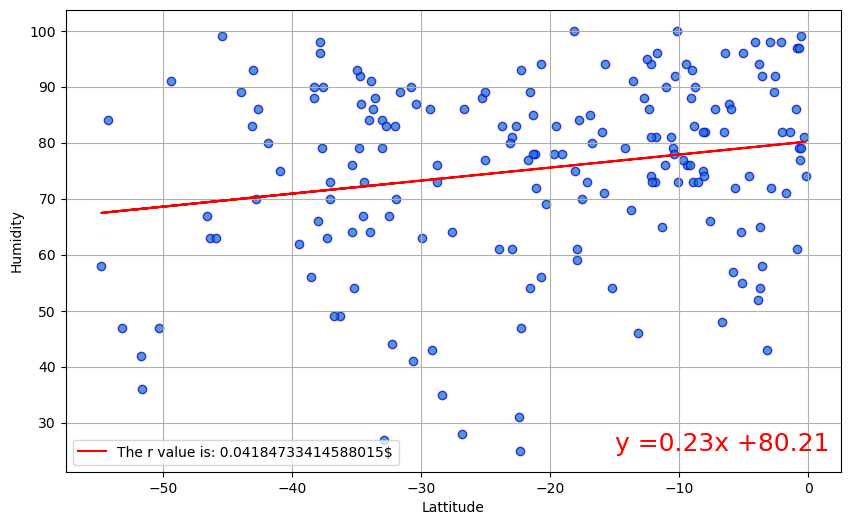

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Create the linear regression plot for Humidity vs. Latitude in the Southern Hemisphere
plot_linear_regression(x_values, y_values, 'Humidity', (-15, 25), 'output_data/FigS_Humidity_Lat.png')


**Discussion about the linear relationship:**  Here the r value is very small and it shows that there is a small correlation between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

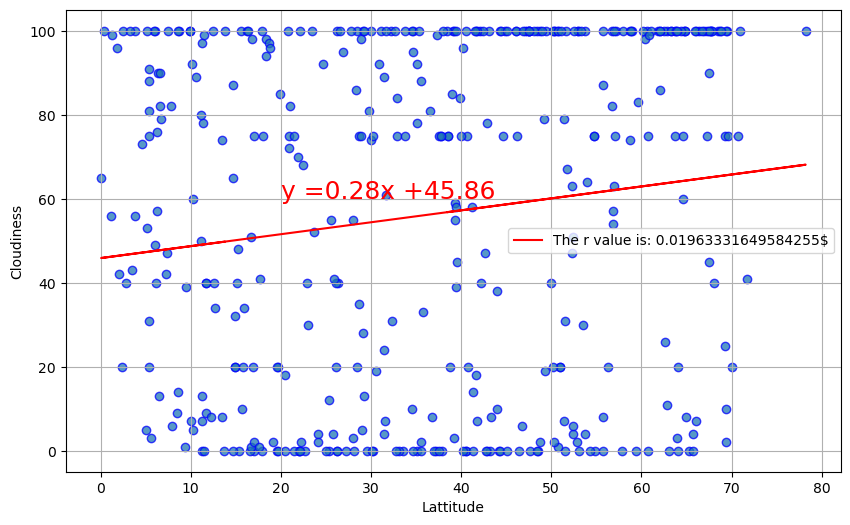

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Create the linear regression plot for cloudiness vs. Latitude in the Northern Hemisphere
plot_linear_regression(x_values, y_values, 'Cloudiness', (20, 60), 'output_data/FigN_Cloudiness_Lat.png')

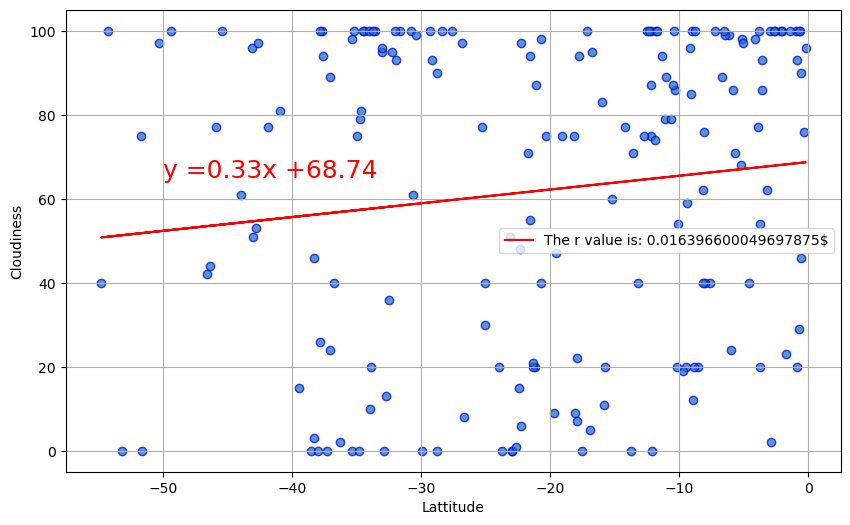

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Create the linear regression plot for cloudiness vs. Latitude in the Southern Hemisphere
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,65), 'output_data/FigS_Cloudiness_Lat.png')

**Discussion about the linear relationship:** the r value shows a very weak correlation between Cloudness and Latitude

### Wind Speed vs. Latitude Linear Regression Plot

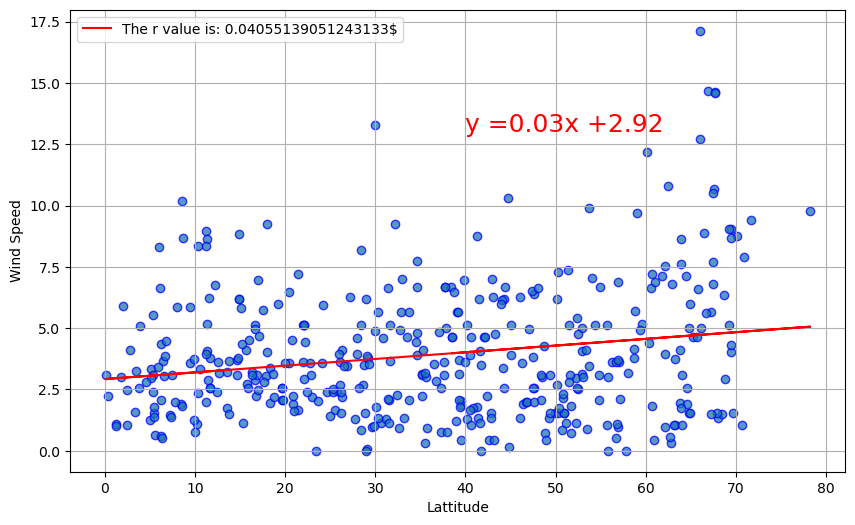

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Create the linear regression plot for Wind Speed vs. Latitude in the Northern Hemisphere
plot_linear_regression(x_values, y_values, 'Wind Speed',(40, 13), 'output_data/FigN_Wind Speed_Lat.png')

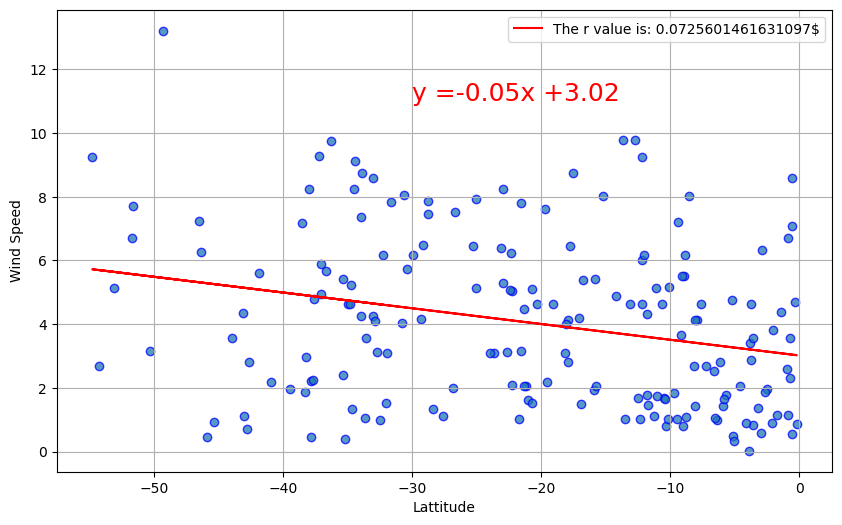

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Create the linear regression plot for Wind Speed vs. Latitude in the Southern Hemisphere
plot_linear_regression(x_values, y_values, 'Wind Speed',(-30, 11), 'output_data/FigS_Wind Speed_Lat.png')

**Discussion about the linear relationship:** the r value indicates there is no relationship between wind speed and latitude.